**Классификация писем на спам с помощью алгоритма наивного байеса**

Задача алгоритма определить, является ли письмо спамом или нет. Этот алгоритм работает с помощью обучения с учителем, поэтому нам нужен датасет со спамом и отмеченными метками. Классификатор представляет текст в виде набора независимых слов и находит спам по определенным словам. Давайте импортируем библиотеки

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('spamdataset.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Всего 4825 нормальных сообщений и 747 спам сообщений**

In [13]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

**Создадим числовую разметку для spam и ham (1,0) в новый столбец 'spam'**

In [14]:
df['spam'] = df['v1'].map({'spam': 1, 'ham': 0})
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0


**Создадим обучающие и тестовые наборы, берем 25% для тестирования. Даем переменные функции, чтобы он брал текст сообщений и разметку спама и обучался.**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.v2, df.spam, test_size=0.25)

**Всего 4179 строк для обучения и 1393 строк для тестирования модели**

In [16]:
print(len(x_train), len(x_test))

4179 1393


**Сообщения мы трансформируем в числовое значение, а именно в матрицу, которое сможет понять модель машинного обучения**

In [17]:
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)

**Вызываем модель наивного байеса и обучаем его на матрице.**

In [18]:
ml = MultinomialNB()
ml.fit(x_train_count, y_train)

MultinomialNB()

**Мы обучили модель, теперь надо его протестировать. Я создам датафрейм с сообщениями для проверки и метками спам это или нет, чтобы потом оценить точность модели.**

In [19]:
messages_test = pd.DataFrame({
    'v2': [
        'Win a free IPhone today!',
        'Lets grab lunch tomorrow.',
        '100% RISK-FREE investment! CLICK HERE!!!!',
        'Hey, can you help me with this task?',
        'Yo, what about my money?',
        'Just buy and forget! Special deal from TSUM! For details click here!',
        'I send you such a funny meme, you MUST watch it!',
        'Wanna meet up today in uni?'
    ],
    'spam': [1, 0, 1, 0, 0, 1, 0, 0]
})

**Преобразуем датафрейм выше в матрицу и отдаем на предсказание модели и создаем новый столбец, где он будет давать свое предсказание.**

In [20]:
messages_test_count = v.transform(messages_test['v2'])
predection = ml.predict(messages_test_count)
messages_test['predicted_spam'] = predection
messages_test

,v2,spam,predicted_spam
0,Win a free IPhone today!,1,1
1,Lets grab lunch tomorrow.,0,0
2,100% RISK-FREE investment! CLICK HERE!!!!,1,1
3,"Hey, can you help me with this task?",0,0
4,"Yo, what about my money?",0,0
5,Just buy and forget! Special deal from TSUM! F...,1,0
6,"I send you such a funny meme, you MUST watch it!",0,0
7,Wanna meet up today in uni?,0,0


In [21]:
acc = accuracy_score(messages_test['spam'], messages_test['predicted_spam'])
print('Точность:', acc)

Точность: 0.875


<function matplotlib.pyplot.show(close=None, block=None)>

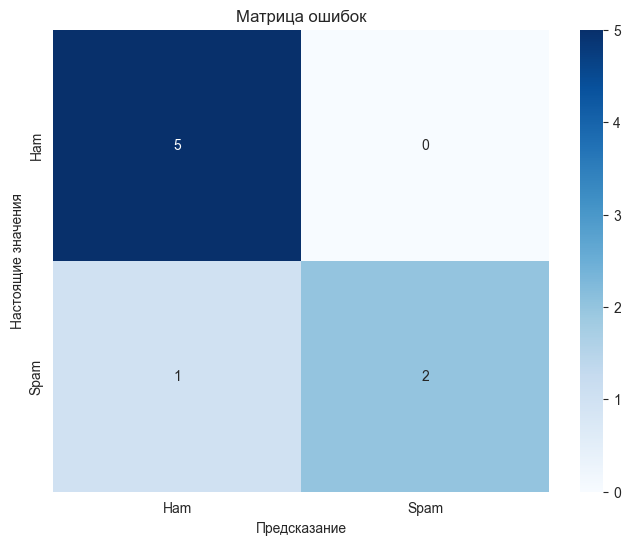

In [22]:
y_true = messages_test['spam']
y_pred = messages_test['predicted_spam']
cmatrix = confusion_matrix(y_true, y_pred, labels=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказание')
plt.ylabel('Настоящие значения')
plt.show

**Точность классификатора равна 87,5%, что очень даже хорошо. Классификатор скорее всего выявлял спам по таким словам как: 100%, free, RISK-FREE и тому подобным словам, которые очень часто встречаются в спамах. Модель не смогла выявить спам в 5 сообщении "Just buy and forget! Special deal from TSUM! For details click here!", потому-что такой пример спама оказался сложным для модели и из-за самого принципа работы наивного байеса, где он учитывает слова по отдельности и не может увидеть связь между словами. Классификатор помогает выявлять явные спамы, но этот результат можно улучшить, если увеличить качество и количество данных для обучения. Но все равно это очень хороший результат и модель может справиться с большим количеством спама.**

Абай Нурланов. Для группы по Data Science в Ала-Тоо